# Tutorial - Introduction to Python

For this tutorial, I will use a chunck of data from my MA Thesis. I am investiganting how income inequality is associate with the rise of far-right parties in the Global South, having Brazil as case study. My research question is: To what extent can income inequality explain vote for far-ring wing parties in Brazil?

Independent variable: variation in the number of families assisted by Coditional Cash Transfer (provided by the Brazilian Electoral Court)
Dependent variable:  vote share for far-right presidential candidate (provided by Secretaria de Avaliação, Gestão da Informação e Cadastro Único (SAGICAD))

Goals of the day: 
1. Recaping preparing environment in Jupiter Notebook
2. Subset data 
3. Transform variables
4. Generate descriptive statistics 
5. Present a map vizualition 
6. Scatter plot and regression line


In [2]:
# Installing Libraries 
!pip install pandas --upgrade
!pip install matplotlib --upgrade
!pip install plotly --upgrade
!pip install numpy --upgrade
!pip install seaborn --upgrade
!pip install geopandas --upgrade
!pip install networkx --upgrade
!pip install geobr --upgrade


[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
#Upload Data
import pandas as pd

# Import the CSV file with better error handling
PBF = pd.read_csv(
    "C:/Users/ludba/OneDrive/Documentos/Penn State/Doutorado/PLSC 550/Final Paper/Data/PBFyr.csv",
    encoding='latin1',  # Try changing to 'utf-8' or 'ISO-8859-1' if issues persist
    sep=';',  # Change if necessary (e.g., ';' for semicolon-separated files)
    on_bad_lines='skip'  # Skips malformed rows
)
print(PBF.columns)





Index(['Codigo', 'Unidade Territorial', 'UF', 'Referencia',
       'Familias PBF (ate Out/2021)', 'Familias PBF (a partir de Mar/2023)',
       'Valor repassado as familias PBF (ate Out/2021)',
       'Valor repassado as familias PBF (a partir de Mar/2023)',
       'Valor do Beneficio medio (ate Out/2021)',
       'Valor do Beneficio medio (a partir de Mar/2023)'],
      dtype='object')


In [4]:
# Subset data 

# Filter for selected election years using column index
PBF_election = PBF[PBF['Referencia'].isin([2006, 2010, 2014, 2018, 2021])].copy()

# Convert year to numeric
PBF_election['year'] = pd.to_numeric(PBF_election['Referencia'], errors='coerce')

# Map year values
PBF_election['year'] = PBF_election['year'].map({
    2006: 2006,
    2010: 2010,
    2014: 2014,
    2018: 2018,
    2021: 2022
})

# Rename columns
PBF_election.rename(columns={'Codigo': 'municipio', 'Familias PBF (ate Out/2021)': 'families'}, inplace=True)

# Select relevant columns
PBF_families = PBF_election[['municipio','year', 'UF','families']].copy()

In [5]:
# Transform variable 

# Compute change in families per municipality and year
PBF_families['change'] = PBF_families.groupby('municipio')['families'].diff()

# Compute percentage change
PBF_families['changepct'] = (PBF_families['change'] / PBF_families['families'])

              change     changepct
count   22264.000000  22264.000000
mean       -3.445248     -0.074915
std      3315.215393      0.530267
min   -351933.000000    -27.357143
25%      -149.000000     -0.199469
50%         0.000000      0.000000
75%       144.000000      0.164139
max    154170.000000      0.956790


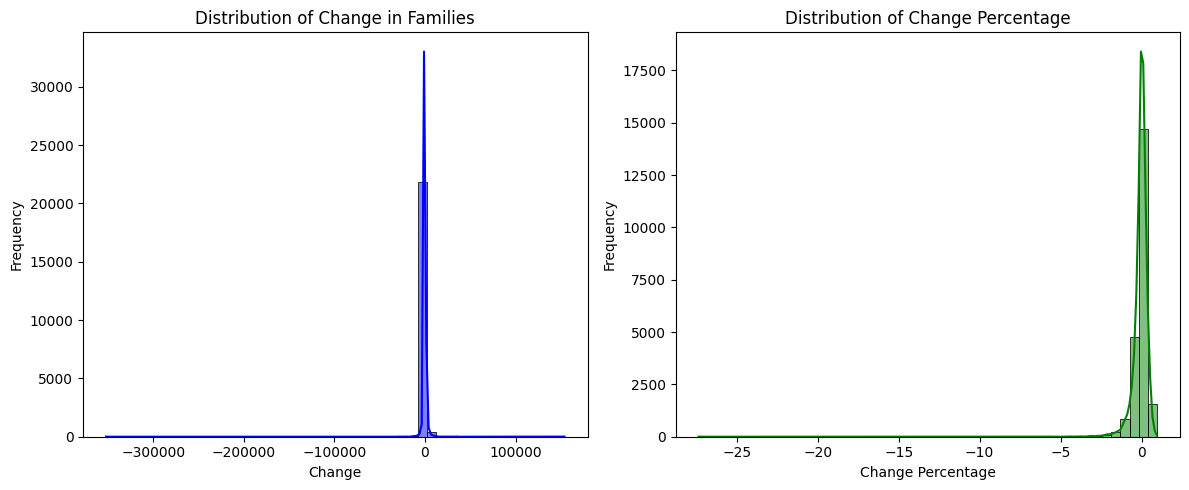

In [6]:
# Descriptive Statistics
import matplotlib.pyplot as plt
import seaborn as sns

print(PBF_families[['change', 'changepct']].describe())

# Visualization
plt.figure(figsize=(12, 5))

# Histogram for 'change'
plt.subplot(1, 2, 1)
sns.histplot(PBF_families['change'], bins=50, kde=True, color='blue')
plt.title('Distribution of Change in Families')
plt.xlabel('Change')
plt.ylabel('Frequency')

# Histogram for 'changepct'
plt.subplot(1, 2, 2)
sns.histplot(PBF_families['changepct'], bins=50, kde=True, color='green')
plt.title('Distribution of Change Percentage')
plt.xlabel('Change Percentage')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

             change     changepct
count  21921.000000  21921.000000
mean      10.483281     -0.041364
std      931.648253      0.345788
min    -9920.000000     -1.665268
25%     -141.000000     -0.187817
50%        2.000000      0.003399
75%      146.000000      0.165712
max     9541.000000      0.956790


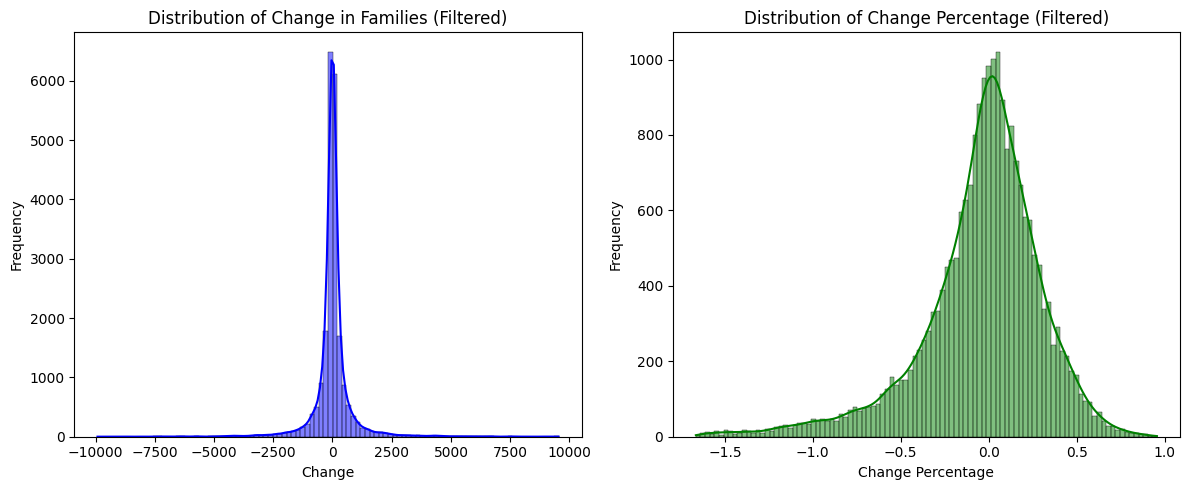

In [7]:
# Subset data within 3 standard deviations from the mean
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the mean and standard deviation for 'change' and 'changepct'
mean_change = PBF_families['change'].mean()
std_change = PBF_families['change'].std()
mean_changepct = PBF_families['changepct'].mean()
std_changepct = PBF_families['changepct'].std()

# Filter the dataset to include only values within 3 standard deviations from the mean
PBF_families_filtered = PBF_families[(
    (PBF_families['change'].between(mean_change - 3 * std_change, mean_change + 3 * std_change)) &
    (PBF_families['changepct'].between(mean_changepct - 3 * std_changepct, mean_changepct + 3 * std_changepct))
)]

# Print the descriptive statistics of the filtered data
print(PBF_families_filtered[['change', 'changepct']].describe())

# Visualization
plt.figure(figsize=(12, 5))

# Histogram for 'change'
plt.subplot(1, 2, 1)
sns.histplot(PBF_families_filtered['change'], bins=100, kde=True, color='blue')
plt.title('Distribution of Change in Families (Filtered)')
plt.xlabel('Change')
plt.ylabel('Frequency')

# Histogram for 'changepct'
plt.subplot(1, 2, 2)
sns.histplot(PBF_families_filtered['changepct'], bins=100, kde=True, color='green')
plt.title('Distribution of Change Percentage (Filtered)')
plt.xlabel('Change Percentage')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


<>:15: SyntaxWarning: invalid escape sequence '\d'
<>:15: SyntaxWarning: invalid escape sequence '\d'
C:\Users\ludba\AppData\Local\Temp\ipykernel_252300\1065798179.py:15: SyntaxWarning: invalid escape sequence '\d'
  PBF_families_2018['municipio'] = PBF_families_2018['municipio'].astype(str).str.extract('(\d+)')
C:\Users\ludba\AppData\Local\Temp\ipykernel_252300\1065798179.py:15: SyntaxWarning: invalid escape sequence '\d'
  PBF_families_2018['municipio'] = PBF_families_2018['municipio'].astype(str).str.extract('(\d+)')


NameError: name 'PBF_families_2018' is not defined

In [57]:
# Electoral Data
import pandas as pd
import seaborn as sns

election2018 = pd.read_csv("C:/Users/ludba/OneDrive/Documentos/Penn State/Doutorado/MA Thesis/Data/election.2018.csv",
    encoding='latin1',  # Try changing to 'utf-8' or 'ISO-8859-1' if issues persist
    sep=';',  # Change if necessary (e.g., ';' for semicolon-separated files)
)

# Municipality Codes
municipios = pd.read_csv("C:/Users/ludba/OneDrive/Documentos/Penn State/Doutorado/MA Thesis/Data/municipios.csv",
    encoding='latin1',  # Try changing to 'utf-8' or 'ISO-8859-1' if issues persist
    sep=';',  # Change if necessary (e.g., ';' for semicolon-separated files)
)

# Display column names
print(municipios.columns)

# Select specific columns
municipios_2 = municipios[["Codigo Municipio Completo", "Nome_Municipio"]].copy()

# Create a new column with the same values as "Nome_Municipio"
municipios_2["nm_municipio"] = municipios_2["Nome_Municipio"]

import pandas as pd

# Create new column "nm_municipio" from "MunicIpio"
election2018["nm_municipio"] = election2018["MunicIpio"]

# Merge election2018 with municipios_2 on "nm_municipio"
election2018 = election2018.merge(municipios_2, on="nm_municipio")

# Filter for "Presidente" in the "Cargo" column
election2018_pres = election2018[election2018["Cargo"] == "Presidente"].copy()

# Create new columns
election2018_pres["year"] = election2018_pres["Ano de eleiCAo"]
election2018_pres["municipio"] = election2018_pres["Codigo Municipio Completo"]
election2018_pres["votes"] = election2018_pres["Votos vAlidos"]

# Subset specific columns
election2018_sub = election2018_pres[["year", "UF", "municipio", "Partido", "votes"]].copy()

# Filter for specific parties
election_FR = election2018_pres[election2018_pres["Partido"].isin(["PPL", "PSL", "Novo", "PSC", "PL", "DEM", "Patriota"])].copy()

# Summarize FR votes by municipality
election_FR = election_FR.groupby("municipio", as_index=False)["votes"].sum().rename(columns={"votes": "FR_votes"})

# Summarize total votes by municipality
election_TV = election2018_pres.groupby("municipio", as_index=False)["votes"].sum().rename(columns={"votes": "tot_votes"})

# Merge while keeping all rows from election_TV
final_election = election_TV.merge(election_FR, on="municipio", how="left")

# Fill missing FR_votes with 0
final_election["FR_votes"] = final_election["FR_votes"].fillna(0)

# Compute vote share, ensuring division by zero does not occur
final_election["voteshare"] = final_election["FR_votes"] / final_election["tot_votes"]
final_election["voteshare"] = final_election["voteshare"].fillna(0)  # Replace NaN with 0



# Merge FR votes and total votes
#final_election = election_FR.merge(election_TV, on="municipio", how="outer")

# Compute vote share
#final_election["voteshare"] = final_election["FR_votes"] / final_election["tot_votes"]

# Display descriptive statistics
#print(final_election["FR_votes"].describe())
print(len(election_TV["municipio"]))

Index(['ï»¿UF', 'Nome_UF', 'Regiao Geografica Intermediaria',
       'Nome Regiao Geografica Intermediaria', 'Regiao Geografica Imediata',
       'Nome Regiao Geografica Imediata', 'Mesorregiao Geografica',
       'Nome_Mesorregiao', 'Microrregiao Geografica', 'Nome_Microrregiao',
       'Municipio', 'Codigo Municipio Completo', 'Nome_Municipio'],
      dtype='object')
4615


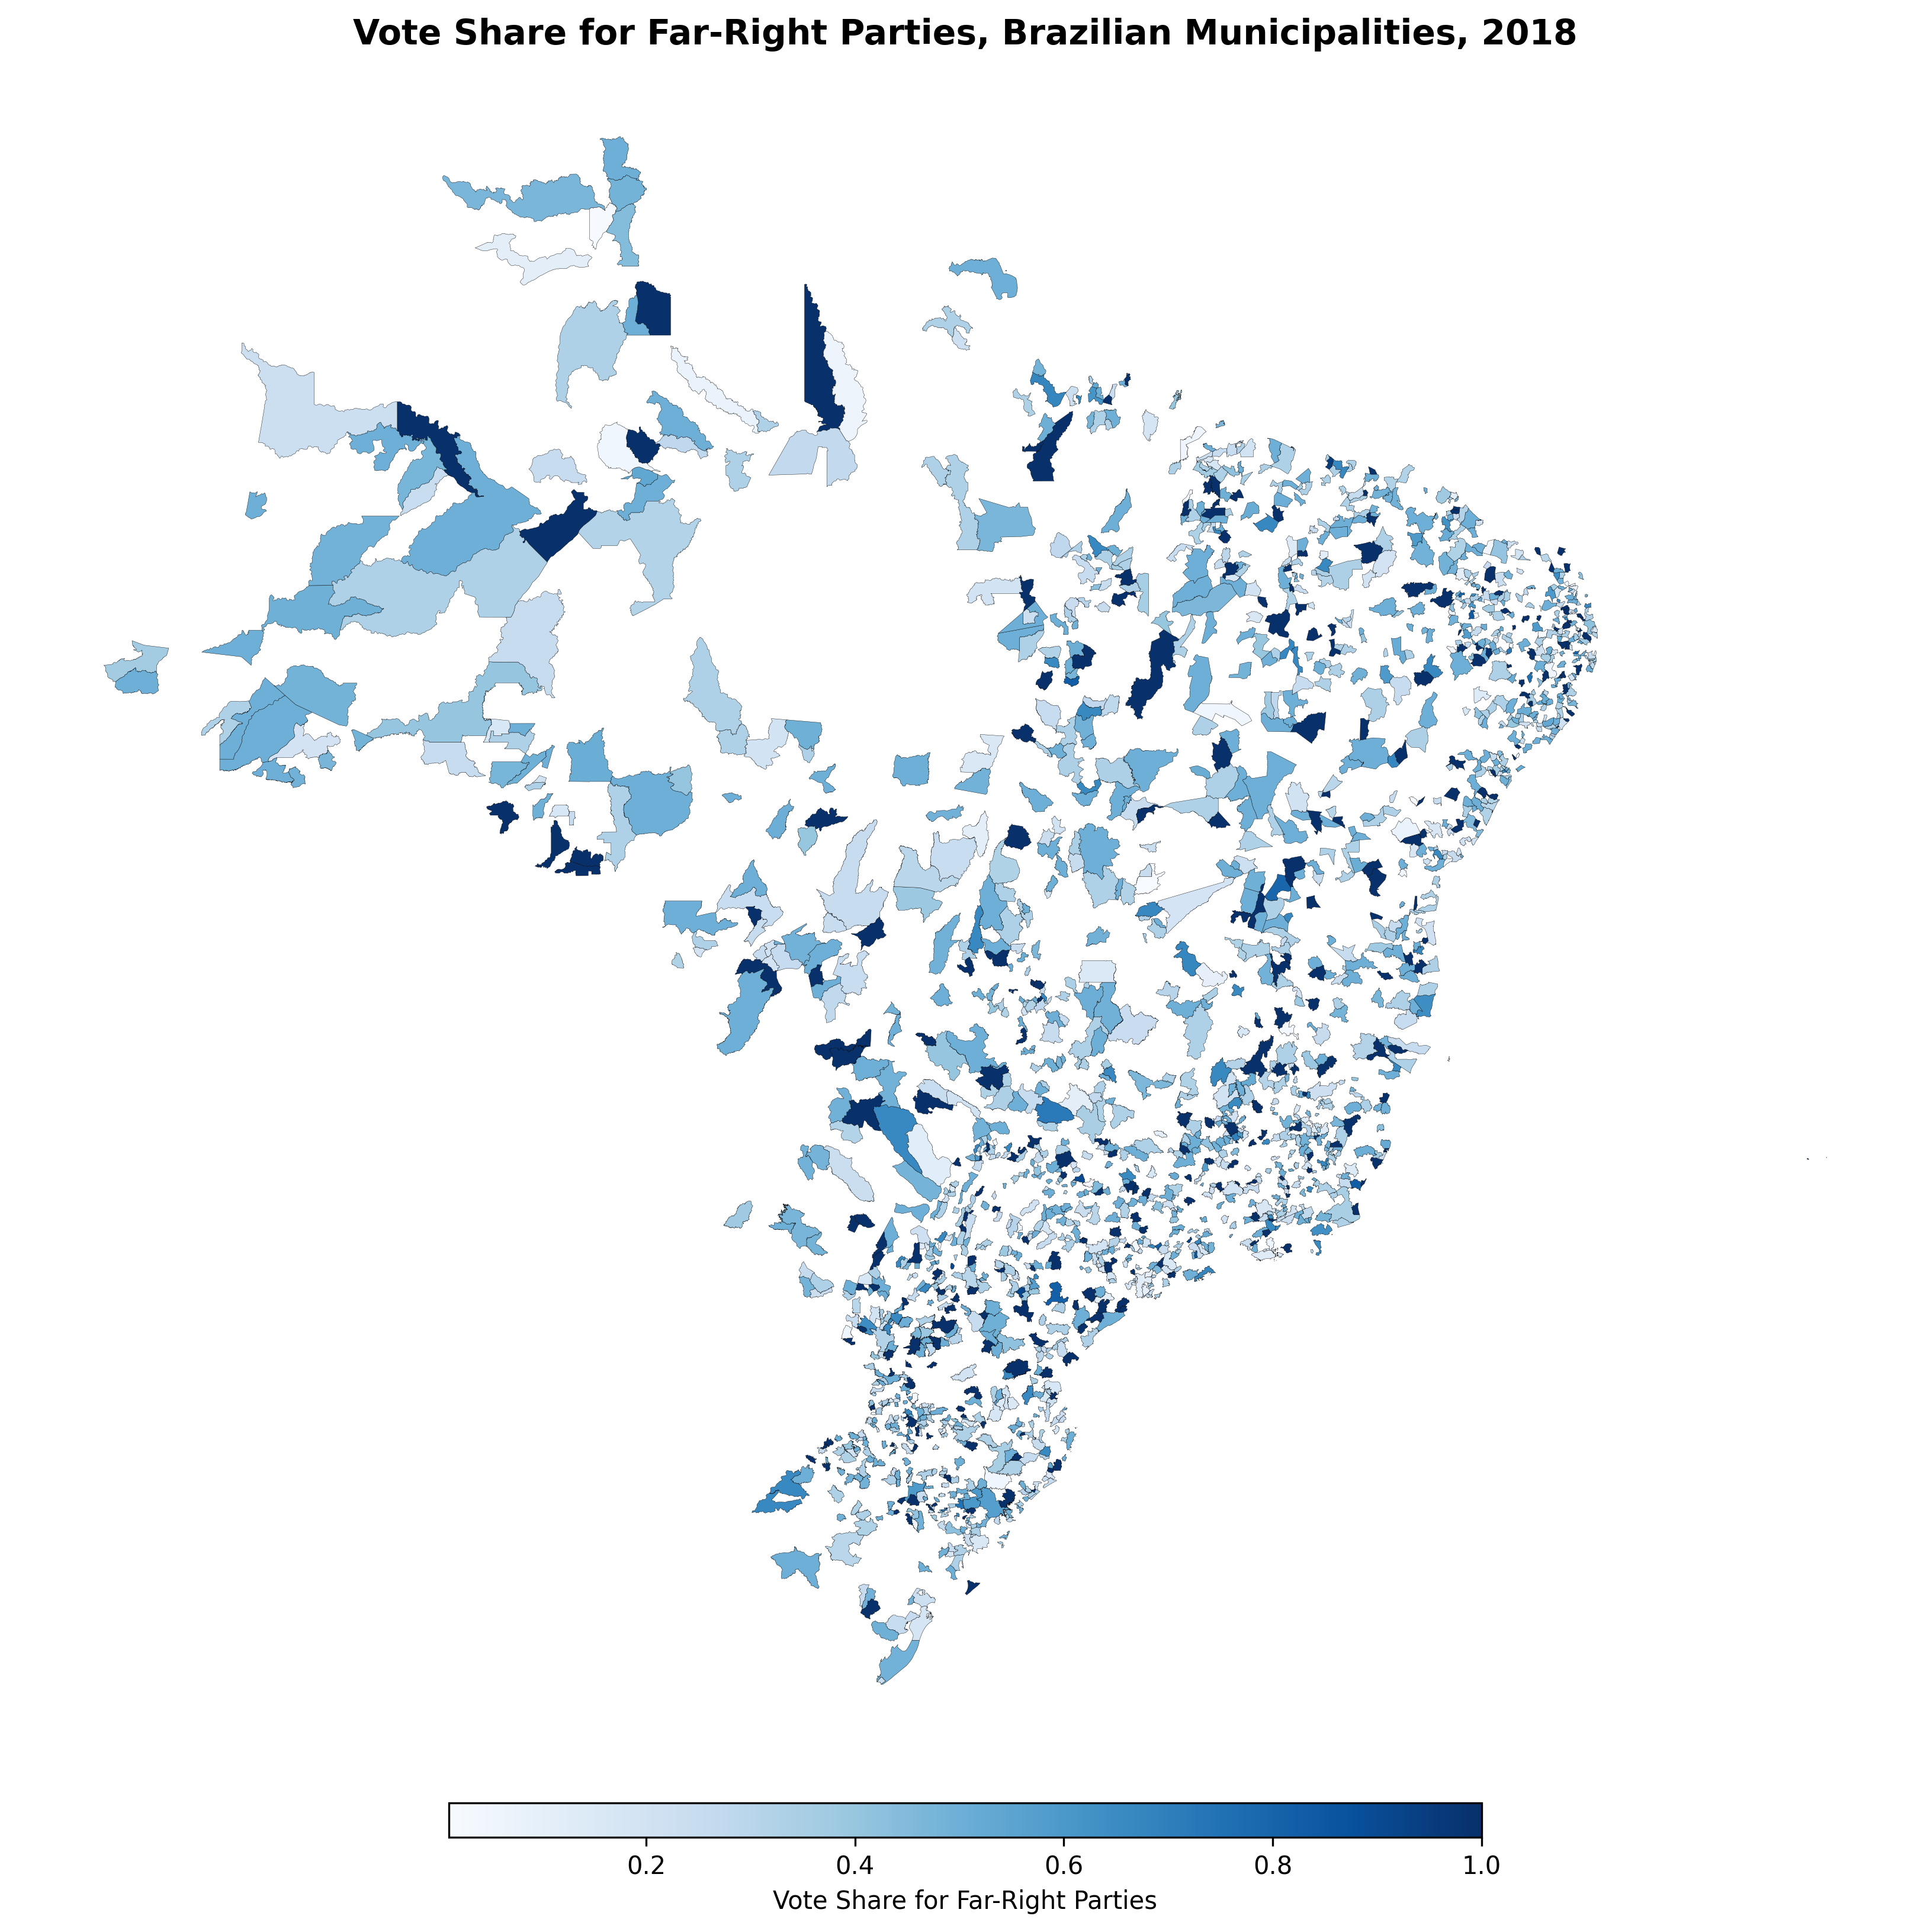

In [55]:
#Present a map of the distribution of the change in families per municipality
import geopandas as gpd
import matplotlib.pyplot as plt
import geobr

%matplotlib inline

# Load all municipalities from geobr
muni = geobr.read_municipality()

# Transform 'code_muni' by dropping the last digit
#muni['code_muni'] = muni['code_muni'].astype(str).str[:-1]

# Ensure 'municipio' is a string and remove non-numeric characters if necessary
#final_election['municipio'] = final_election['municipio'].astype(str).str.extract('(\d+)') 

# Merge with PBF data
muni = muni.merge(final_election, left_on='code_muni', right_on='municipio', how='left')

# Plot
fig, ax = plt.subplots(figsize=(15, 15), dpi=300)

# Plot municipalities with refined borders and improved legend
muni.plot(
    column="voteshare",  # Color by vote share
    cmap="Blues",  # Color palette
    legend=True,
    edgecolor="black",  # Thinnest possible black borders
    linewidth=0.1,  # Minimal border thickness
    legend_kwds={
        "label": "Vote Share for Far-Right Parties",
        "orientation": "horizontal",
        "shrink": 0.5,  # Properly scales the legend
        "aspect": 30,  # Makes the color bar wider for better readability
        "pad": 0.02,  # Slightly adjusts position
    },
    ax=ax,
)

# Set title
ax.set_title(
    "Vote Share for Far-Right Parties, Brazilian Municipalities, 2018",
    fontsize=14,
    fontweight="bold",
)

# Remove axis borders
ax.axis("off")

# Show the plot
plt.show()



In [141]:
# print the data
print(PBF_families.head())

print(gdf.head())

    municipio  year  UF  families  change  changepct
5      120001  2018  AC    1855.0     NaN        NaN
9      120001  2022  AC    1794.0   -61.0  -0.034002
14     120001  2010  AC    1033.0  -761.0  -0.736689
15     120001  2006  AC     779.0  -254.0  -0.326059
17     120001  2014  AC    1823.0  1044.0   0.572682
   CD_MUN                 NM_MUN  CD_RGI     NM_RGI CD_RGINT     NM_RGINT  \
0  110001  Alta Floresta D'Oeste  110005     Cacoal     1102    Ji-Paraná   
1  110002              Ariquemes  110002  Ariquemes     1101  Porto Velho   
2  110003                 Cabixi  110006    Vilhena     1102    Ji-Paraná   
3  110004                 Cacoal  110005     Cacoal     1102    Ji-Paraná   
4  110005             Cerejeiras  110006    Vilhena     1102    Ji-Paraná   

  CD_UF     NM_UF CD_REGIAO NM_REGIAO CD_CONCURB NM_CONCURB  AREA_KM2  \
0    11  Rondônia         1     Norte       None       None  7067.127   
1    11  Rondônia         1     Norte       None       None  4426.143   
